In [ ]:
! pip install transformers

In [ ]:
from transformers import pipeline, AutoTokenizer
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Check if a GPU is available and set the device
device_idx = 0 if torch.cuda.is_available() else -1
protgpt2 = pipeline('text-generation', model="nferruz/ProtGPT2", device=device_idx)


In [ ]:
tokenizer = ProtGPT2Tokenizer.from_pretrained("nferruz/ProtGPT2")
config = ProtGPT2Config.from_pretrained("nferruz/ProtGPT2")
config.num_labels = num_labels  # Set the number of labels for your task
model = ProtGPT2LMHeadModel.from_pretrained("nferruz/ProtGPT2", config=config)

In [ ]:
seq_mom = "SSDTATSKLSGMTG"

In [ ]:
%%time
sequences = protgpt2(f"<|endoftext|>",
                     max_length=1000,
                     do_sample=True,
                     top_k=950,
                    #  top_p=2,
                     repetition_penalty=1.2,
                     num_return_sequences=20,
                     eos_token_id=0,
                    #  temperature=0.0
                     )

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


CPU times: user 22.6 s, sys: 1.19 s, total: 23.8 s
Wall time: 25.5 s


In [ ]:
for seq in sequences:
  print(seq)
  break

{'generated_text': '<|endoftext|>\nMAGRESSGKNTCENRSLIPTRPGSCCFTNSPICPWWDWYCQWSVKVSSPPTVASPCSIRA\nDDTWISNWPMKNSCACRISFGSSSPRPIVSAWRRLPATVCCPSSRSPRWTTIKASSSTSS\nAAGRAASSWTRRRMTTSTTPIASGTSSGDRSGTSGPVRVWWLRWRPMRWVSARPTGWAAT\nCRPTTRGRSKRPSSRLTTSAPGPMHRWNCCGRSPATSGPQTGGSWSVWRMPSCMRSPVSS\nTGCSRSSCRAXFRMSLITSLSHWRRPFWVRPAVPSGRLPTIWPWRRCATPATSRAHTPSP\nSLPTTSRSRRWSSWTASMAAPGWRAGSAASRIRVRRSSSSTGLRAPSTRPSRSATWAWTN\nLSRSRGGRFCTACRRVTSPSPSGSSGSRPTRWCAAARSRAAPTRARSRFRASWRWKRPAK\nTAGGGCTSAASRSRTGSRPRRSACRMPSRWRCATPRPGRNPRCRPRPRASSGASRRRRRT\nGPVVTPLRVLIPAAGMGRRMGASRQKLLLPLGGKPVLAHVLETFLAAEEVDGIVAVVGPA\nDVAACRATVAAYSAVKPVRVVVGGARRQDSVHRGLLALPPDAPWVLIHDGARPFVTPALI\nQRCLEAGRRHGAAVLGVPVKDTVKAVSAQDCVIRTVNRPELWQVQTPQVFRGPLLLEAHR\nRAVAEGFTGTDDASLVERAGHPVRLVEGEPDNIKVTTPEDLVMAEAVLAHRTGGV\n'}


In [ ]:
seq['generated_text'].replace("\n","")

'<|endoftext|>MAGRESSGKNTCENRSLIPTRPGSCCFTNSPICPWWDWYCQWSVKVSSPPTVASPCSIRADDTWISNWPMKNSCACRISFGSSSPRPIVSAWRRLPATVCCPSSRSPRWTTIKASSSTSSAAGRAASSWTRRRMTTSTTPIASGTSSGDRSGTSGPVRVWWLRWRPMRWVSARPTGWAATCRPTTRGRSKRPSSRLTTSAPGPMHRWNCCGRSPATSGPQTGGSWSVWRMPSCMRSPVSSTGCSRSSCRAXFRMSLITSLSHWRRPFWVRPAVPSGRLPTIWPWRRCATPATSRAHTPSPSLPTTSRSRRWSSWTASMAAPGWRAGSAASRIRVRRSSSSTGLRAPSTRPSRSATWAWTNLSRSRGGRFCTACRRVTSPSPSGSSGSRPTRWCAAARSRAAPTRARSRFRASWRWKRPAKTAGGGCTSAASRSRTGSRPRRSACRMPSRWRCATPRPGRNPRCRPRPRASSGASRRRRRTGPVVTPLRVLIPAAGMGRRMGASRQKLLLPLGGKPVLAHVLETFLAAEEVDGIVAVVGPADVAACRATVAAYSAVKPVRVVVGGARRQDSVHRGLLALPPDAPWVLIHDGARPFVTPALIQRCLEAGRRHGAAVLGVPVKDTVKAVSAQDCVIRTVNRPELWQVQTPQVFRGPLLLEAHRRAVAEGFTGTDDASLVERAGHPVRLVEGEPDNIKVTTPEDLVMAEAVLAHRTGGV'

# fine tuning

In [ ]:

# Load the tokenizer for the ProtGPT2 model
tokenizer = AutoTokenizer.from_pretrained("nferruz/ProtGPT2", device=device_idx)

# Extract the vocabulary
vocab = tokenizer.get_vocab()
vocab_df = pd.DataFrame.from_dict(vocab,orient="index")
vocab_df.reset_index(inplace=True)
vocab_df.columns = ["word","token"]

In [ ]:
vocab_df

,word,token
0,NIEL,14233
1,EIAV,43651
2,ATS,841
3,RKRE,13777
4,AGDL,4371
...,...,...
50252,YTEL,34324
50253,KLSGMTG,28996
50254,RYIP,36022
50255,NEQN,37957


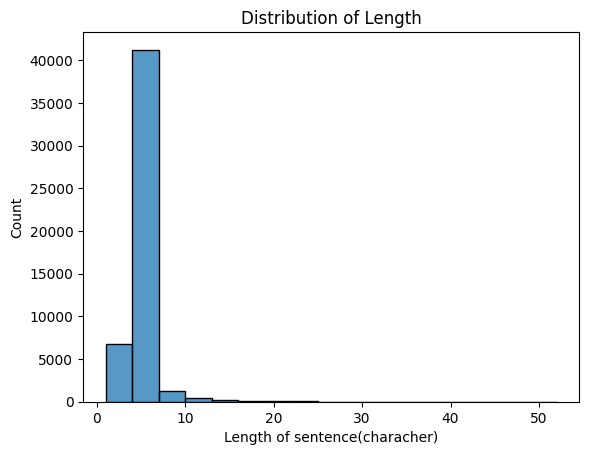

In [ ]:
# Generate example data
data = vocab_df["word"].str.len()

# Create histogram using Seaborn
sns.histplot(data, kde=False)

# Add labels and title
plt.xlabel('Length of sentence(characher)')
plt.ylabel('Count')
plt.title('Distribution of Length')

# Show the plot
plt.show()
